## Hello !!

This notebook is sort of a start on important concepts in Machine Learning like 

1)Feature Selection

2)Model selection

3)Input validation

....

Excuus vooraf half Nederlands/Engels document.


In [2]:
# Import nodige modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


### Opdracht 1: 
Gebruik pandas (pd) om het bestand diabetes.csv in te lezen en toe te kennen aan diab variabele. 

In [3]:
diab = pd.read_csv("diabetes.csv")

### Opdracht 2:
Check de data zijn alle records in de tabel juist.
Maak drie tests in python om te zien of de data correct is. 

TIP: het pandas object heeft hiervoor ook een aantal ingebouwde functies. (desscribe())

In [4]:
print(diab.describe())
print(diab.info())
print(diab.head())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### Opdracht 3:

Hoeveel gevallen van diabetes zijn er?
Is het volgens jouw een probleem dat er een verschil is tussen het aantal diabetes gevallen en geen diabetes?
Kan je een uitspraak doen over het aantal mannen?

Reken de waarden hieronder uit.


In [5]:
print(len(diab[diab['Outcome'] == 1]))

268


Wat opvalt is dat er veel minder mensen met diabetes zijn dan met. Dit is geen probleem, maar je moet dan oppassen met
eventuele metrics die je gebruikt. E.g. accuracy zou niet een valide metric zijn om modellen met deze dataset te
testen.
We kunnen geen uitspraak doen over de mannen, aangezien we niet duidelijk de sexe eruit kunnen halen. Je kan er uit
 halen welke mensen niet zwanger zijn, maar daar kunnen nog steeds vrouwen tussen zitten.

### Een korte analyse.

Bekijk de onderstaande plots, valt er iets op? 

<ipython-input-6-8cf4194a1e93>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


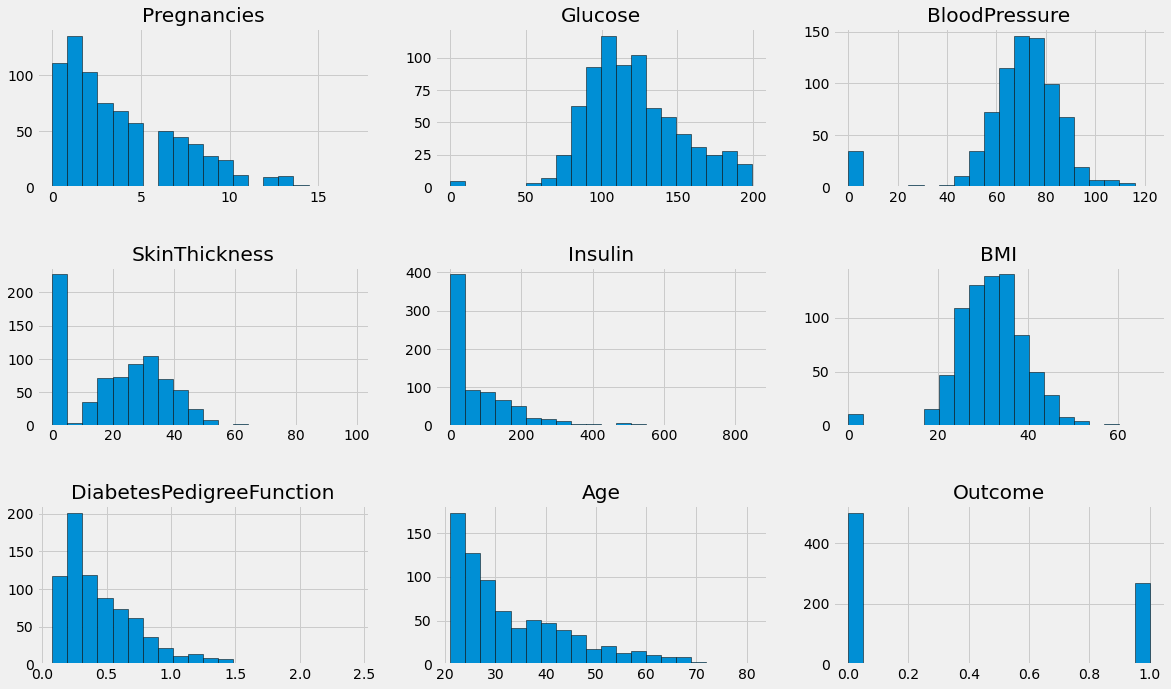

In [6]:
columns=diab.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Wat valt er op?

Wat opvalt is dat je in de insuline plot en enorme spike kan zien. Dit kan aantonen dat dit mensen met diabetes
type 1 zijn. Ook valt op dat er in de BMI, glucose huiddikte en bloedruk plot er een enorme spike

### Opgave 5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie? 

Bevatten sommige kolommen ongeldige waarden?

Repareer de tabel zo dat er geen nul waarden instaan? 

Welke waarde zou je kiezen als vervanging van de nul waarden?


TIP: Maak eerst een tabel met alleen de diabetes gevallen. 

<ipython-input-7-8d9b0003fa8e>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)
<ipython-input-7-8d9b0003fa8e>:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


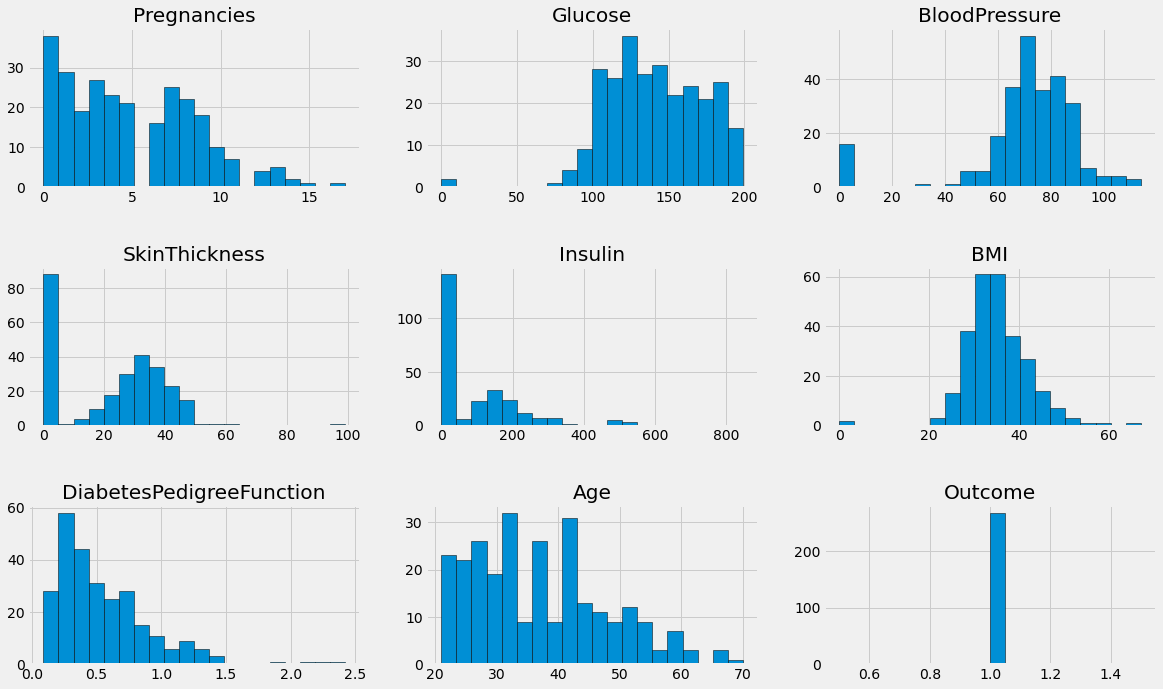

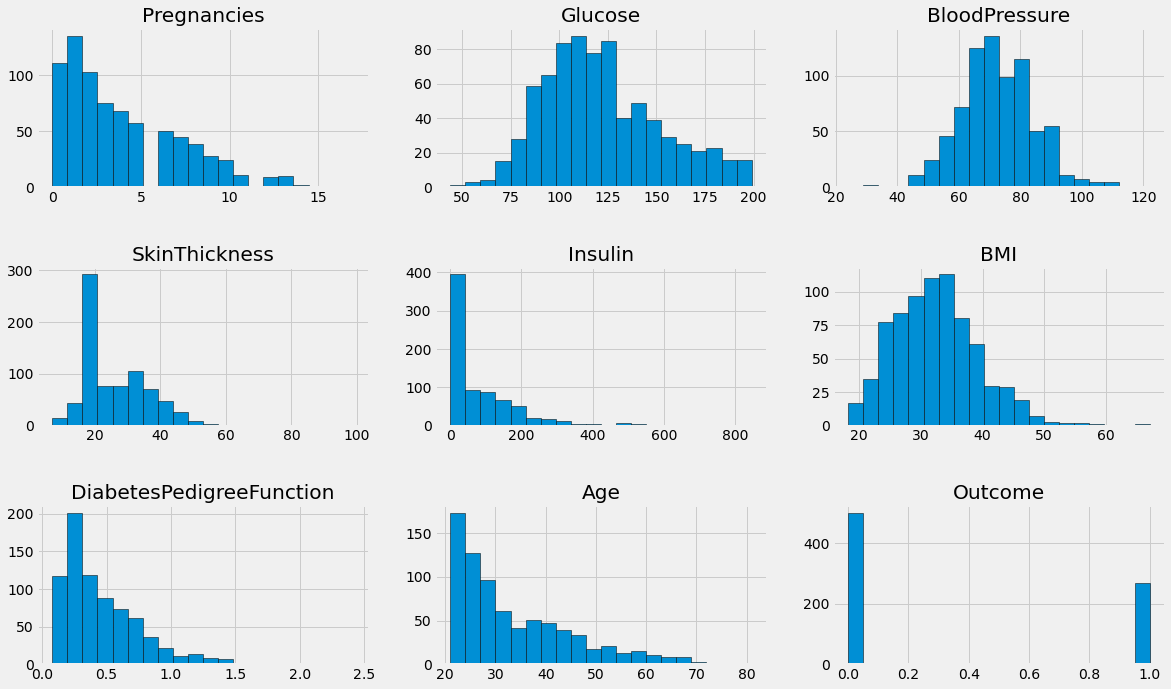

In [7]:
diab_only = diab[diab['Outcome'] == 1]

columns=diab_only.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab_only[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


diab['SkinThickness'].replace(0, diab['SkinThickness'].mean(), inplace=True)
diab['BMI'].replace(0, diab['BMI'].mean(), inplace=True)
diab['BloodPressure'].replace(0, diab['BloodPressure'].mean(), inplace=True)
diab['Glucose'].replace(0, diab['Glucose'].mean(), inplace=True)

columns=diab.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


Vergeleken met het totaal, lijkt het dat mensen met diabetes een stukje ouder zijn. Verder is er niet echt een
groot verschil. Voor het vervangen van de nul waarde lijkt het gemiddelde een goede oplossing.

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hierondergenoemde classifier de mediawiki pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Om welke reden zou je een bepaalde clasifier keizen?
.
.
.
.
.
.
.
.

De eerste stap is om het probleem te bepalen. Wij willen uiteindelijk kijken naar de outcome, wat een nummer is dat
aangeeft of een persoon diabetes heeft of niet. Bij outcome zijn er 2 hele getallen, wat betekent dat we een
binair classificatie probleem hebben.

KNN is a classifier that can take a point, and then look at a varying number K neighbours, to determine which neighbour
 said point is generally closer to, and use that to predict an outcome.

Logistic regression is a classifier that tries to find the most optimal straight line (think of a graph) to best
represent the data. Then you can use that line to create a yes/no response for a point to determine an outcome.

A support vector machine takes roughly the same idea as LR, as it tries to find a way to divide the classes. If you do
 this 2 dimensionally however, then it becomes a bit difficult if your data is shuffled through each other. What scv
 does then, is adding more dimensions to split the data into a multidimensional space, and use that to predict the data.

Een decision tree is a classifier that uses a tree like structure to make decisions and predict an outcome

Because of this my first choice would be a support vector machine, as we have a lot of different feature types.

In [8]:
# Importeen aantal standaard systeem voor machine-learning

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 6:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschijving:

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [9]:
# De code hieronder is absuluut noodzakelijk voor een ML training.

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

Simply said what happens here is that we are splitting our data into a training and test dataset. Here it can be noted
 that we have a 75/25 train/test split, are setting a seed, and stratifying the outcome. stratifying means that for a
 certain column we divide the data such that we keep the same proportion of the classes.

In [10]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80.0,74.000000,11.000000,60,30.0,0.527,22
453,2,119.0,69.105469,20.536458,0,19.6,0.832,72


In [11]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

### SVM

In [12]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.7604166666666666
Accuracy for SVM kernel= linear is 0.7604166666666666


### Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.765625


### Opdracht :
Maak voor de decision tree classifier een getraind model en test de nauwkeurigheid.



In [14]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy of a Decision tree is',metrics.accuracy_score(prediction,test_Y))


The accuracy of a Decision tree is 0.71875


### Alle systemen op een rijtje.


In [15]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.760417
Radial Svm,0.760417
Logistic Regression,0.765625
KNN,0.729167
Decision Tree,0.713542


The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. I will do these things in subsequent parts.

## Feature Extraction/ Selection:
1)A lot many features can affect the accuracy of the algorithm.

2)Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

3)It reduces training time and reduces overfitting

4)We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

### Correlation Matrix

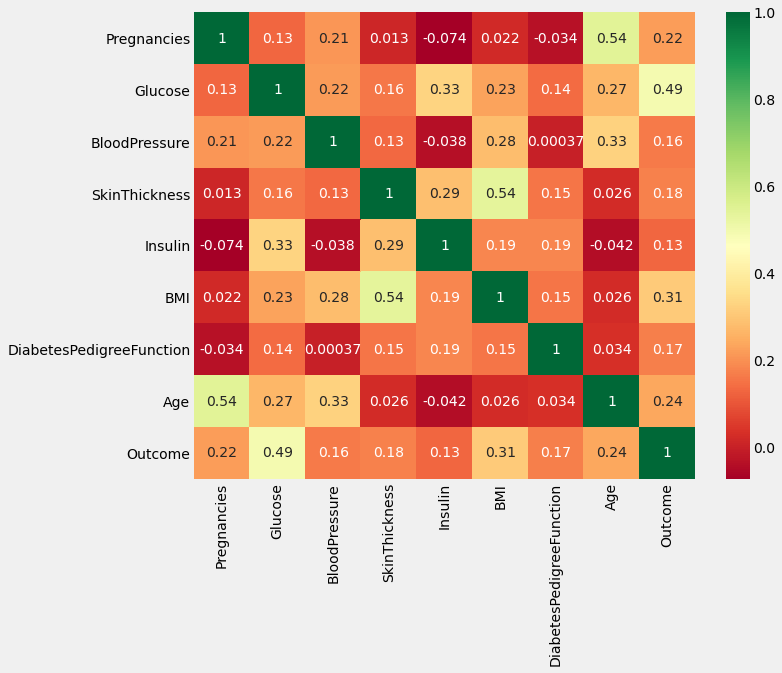

In [16]:
sns.heatmap(diab[diab.columns[:9]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Vraag: Wat zie je in de correlatie matrix zegt het iets over de features, en zo ja wat?

In [17]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.254215
BMI                         0.165356
Age                         0.138583
DiabetesPedigreeFunction    0.119861
BloodPressure               0.093987
Pregnancies                 0.085226
SkinThickness               0.072516
Insulin                     0.070256
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Wat is een  correlatie matrix?



Een correlatie matrix laat zien hoe sterk de correlatie is tussen 2 verschillende features. Des te hoger, des te
sterker de correlatie.

### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes?

.
.
.
.
.
.
.
.
.

Dus als we naar de correlaties waarden kijken dan hebben glucose, BMI, pregnancies en age een sterke correlatie met de
outcome. Bloodpressure en skinthickness hebben een minder sterke waarde, dus die zou ik weg
laten tijdens het trainen.

### Opdracht x:

Selecteer uit de dataset nu alleen de belangrijkste features en train en test de voorgaande modelen. 
Zijn de resultaten op de naukeurigheid toegenomen of juist niet?

In [19]:
# Maak nu op basis van het nieuw getraind model een kleine app(in het notebook) 
# dat vraagt om de features en voorspelt of er sprake is van diabetes.

# Succes.
from sklearn.model_selection import GridSearchCV

# Drop unneeded rows
new_diab = diab.copy()
new_diab.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)
outcome= new_diab['Outcome']
data=new_diab[new_diab.columns[:6]]

# Search for best random state
best_acc = 0
current_i = 0

for i in range(50):
    # Create new train test split
    train,test=train_test_split(new_diab,test_size=0.25,random_state=i,stratify=diab['Outcome'])# stratify the outcome
    train_X=train[train.columns[:4]]
    test_X=test[test.columns[:4]]
    train_Y=train['Outcome']
    test_Y=test['Outcome']

    # Grid search SVC
    print("Grid searching...\n")
    param_grid = dict(max_depth=list(range(1,10)),
                      min_samples_split=[1,2,3],
                      min_samples_leaf=[1,2, 3],
                      criterion=['gini', 'entropy'])
    dt = DecisionTreeClassifier(random_state=i)
    grid = GridSearchCV(dt, param_grid, cv=5, scoring ='accuracy', verbose=0)
    grid.fit(train_X, train_Y)
    print("Printing best results...\n")
    print(grid.best_params_)


    # Metrics
    model = DecisionTreeClassifier(**grid.best_params_)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction,test_Y)
    print('Accuracy for Tree is', accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        current_i = i
        print(f"Better i found {i}, with acc of {accuracy}")

print(f"best acc = {best_acc}, with random state {i}")

Grid searching...

Printing best results...

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy for Tree is 0.6614583333333334
Better i found 0, with acc of 0.6614583333333334
Grid searching...

Printing best results...

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy for Tree is 0.6927083333333334
Better i found 1, with acc of 0.6927083333333334
Grid searching...

Printing best results...

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy for Tree is 0.5729166666666666
Grid searching...

Printing best results...

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy for Tree is 0.6458333333333334
Grid searching...

Printing best results...

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Tree is 0.640625
Grid searching...

Printing best results...

{'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



TypeError: object of type 'NoneType' has no len()

# Laatste opdracht: bewaar dit notebook op je persoonlijke gitlab project in een folder genaamd bootcamp/notebooks
    